#Uvod

Valne duljine signala koji se prostiru kanalom najčešće iznose između 1mm i 100 km. Svojstva bežičnog komunikacijskog sustava jako ovise o dinamičnom i nepredvidljivom bežičnom kanalu čija je analiza često otežana.

Najjednostavniji slučaj širenja signala je širenje u slobodnom prostoru (odašiljač je jedna antena, a prijamnik druga). Prema Friisovom zakonu, poznato je da prijamna snaga pada s udaljenosti od odašiljača.

U realističnijim uvjetima, signal se ne širi slobodno, već postoje objekti u interakciji sa signalom (dielektrične i vodljive prepreke). Ako ti objekti imaju glatke površine (puno većih dimenzija od valne duljine signala), valovi se reflektiraju od njih, a dio energije prolazi u sam objekt. U slučaju hrapavih površina, valovi se raspršuju. Također, valovi se mogu ogibati na rubovima prepreka.

Prema tome, temeljni mehanizmi širenja elektromagnetskih valova bežičnim komunikacijskim kanalom su:


*   refleksija i transmisija,
*   difrakcija (ogib) te
*   raspršenje.

U sklopu ove vježbe, proučavat će se širenje signala u slobodnom prostoru i difrakcija na prepreci (model oštrice noža).

*Napomena: Neki zadaci sadrže pojmove koji nisu objašnjavani na predavanjima. Za odgovore je potrebno istražiti internetske izvore i/ili literaturu preporučenu na stranici predmeta.*

#1. Širenje signala u slobodnom prostoru


**Zadatak 1.**

a) Napisati kod koji modelira gubitak u slobodnom prostoru prema Friisovom zakonu. Grafički prikazati ovisnost gubitka slobodnog prostora u ovisnosti o udaljenosti (razmaku) odašiljačke i prijamne antene (u rasponu od 10 m do 20 km).

b) Što se događa ako je prijamnik blizu odašiljača?

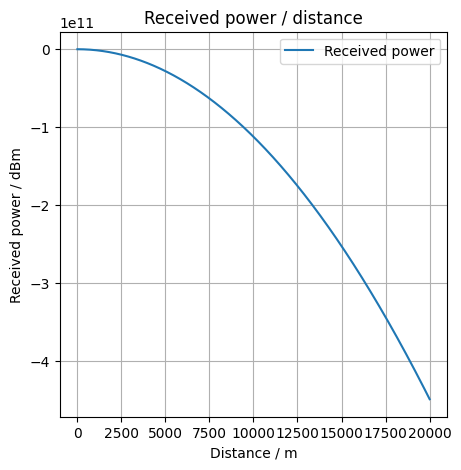

In [3]:
import numpy as np
import matplotlib.pyplot as plt

freq = 800e6
tx_power = 5
rx_antenna = 1
tx_antenna = 1
distances = np.linspace(10, 20000, 1000)

def received_power(d, freq, tx_power, rx_antenna, tx_antenna):
    c = 3e8
    lambda_ = c / freq
    L_fs = ((4 * np.pi * d) / lambda_) ** 2
    Pr = tx_power + tx_antenna + rx_antenna - L_fs #logovi, L_fs je 1/L_fs
    return Pr

received_powers = [received_power(d, freq, tx_power, rx_antenna, tx_antenna) for d in distances]

plt.figure(figsize=(5, 5))
plt.plot(distances, received_powers, label='Received power')
plt.title('Received power / distance')
plt.xlabel('Distance / m')
plt.ylabel('Received power / dBm')
plt.grid(True)
plt.legend()
plt.show()



<font color='green'>
b) Ako su antene vrlo blizu jedna drugoj pogotovo unutar udaljenosti koja je manja od valne duljine signala, pretpostavka Friisove formule za gubitak u slobodnome prostoru neće biti ispravna. Kada su antene vrlo blizu, javljaju se efekti bliskog polja. U bliskom polju ponašanje elektromagnetskog polja može biti vrlo složeno i ne slijedi iste principe kao u dalekom polju gdje je primjenjiva Friisova formula.
</font>

U nastavku vježbe koristit će se *wave propagation framework* s MIT licencom.

In [4]:
!pip install wpf

from rwp.environment import *
from rwp.sspade import *
from rwp.vis import *
from rwp.kediffraction import *
from rwp.antennas import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /usr/local/lib/python3.10/dist-packages/propagators/_cn_utils.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
performance hint: /usr/local/lib/python3.10/dist-packages/propagators/_cn_utils.pyx:99:26: Index should be typed for more efficient access
performance hint: /usr/local/lib/python3.10/dist-packages/propagators/_cn_utils.pyx:100:12: Index should be typed for more efficient access
performance hint: /usr/local/lib/python3.10/dist-packages/propagators/_cn_utils.pyx:101:21: Index should be typed for more efficient access
performance hint: /usr/local/lib/python3.10/dist-packages/propagators/_cn_utils.pyx:101:35: Index should be typed for more efficient access
performance hint: /usr/local/lib/python3.10/dist-packages/propagators/_cn_utils.pyx:101:12: Index should be typed for more

Radni okvir razvijen je za troposferske uvjete. Udaljenost odašiljača i prijamnika, odašiljača i prepreke, prepreke i prijamnika te visine navedenih komponenata radijskog sustava izražene su u metrima. Zadana polarizacija antene je horizontalna. Horizontalno polarizirana komponenta električnog polja u 2D koordinatnom sustavu slijedi Helmholtzovu jednadžbu. Za izračun širenja vala preko nepravilnog terena i u urbanom okolišu koristi se koncept takozvane parabolične jednadžbe. Model širenja signala u sklopu ove koristi Padéovu metodu s podijeljenim koracima (engl. *split-step Padé*).

**Zadatak 2.**

a) Što je to Helmholtzova jednadžba?

b) Što je Padéova aproksimacija? Zašto se u model širenja signala dobro uklapa *split-step Padé*?

<font color='green'>
Helmholtzova jednadžba koristi se u opisivanju rasprostiranja elektromagnetskih valova te definiranju propagacije signala u sustavima mobilnih komunikacija. U tom se kontekstu pomoću Helmholtzove jednadžbe opisuje rasprostrianje elektromagnetskih valova kroz različita sredstva, opis elektromagnetskog polja oko samih uređaja na prijamnoj i odašiljačkoj strani te optimizaciju cijelokupnog sustava.

Padeova aproksimacija je matematička metoda za aproksimaciju funkcije racionalnom funkcijom. To znači da se funkcija aproksimira razlomkom dvaju polinoma, a može se koristiti za aproksimaciju bilo koje funkcije. Padeova aproksimacija obično pruža bolju aproksimaciju funkcije od razvoja u Taylorov red, a i dalje je valjana u području gdje Taylorov red ne konvergira. Zbog toga je pogodnija u računalno potpomognutim izračunima.

Split-step Pade se često koristi u modelima širenja signala jer se dobro uklapa u numeričke simulacije, a razlog tome je što je split-step Padé aproksimacija eksponencijalne funkcije stabilna i točna.U modelima širenja signala, eksponencijalna funkcija se često koristi za modeliranje širenja signala kroz disperzivne medije, medije u kojima brzina širenja signala ovisi o frekvenciji signala. Split-step Pade aproksimacija eksponencijalne funkcije se može koristiti za modeliranje širenja signala kroz disperzivne medije na numerički stabilan i točan način jer je Pade aproksimacija eksponencijalne funkcije eksplicitna, što znači da se može izračunati bez potrebe za iteracijama.

Možemo zaključiti da su obje tehnike razvijene i koriste se u modernim simulacijama jer su prilagođene numeričkim tehnikama analize koje se koriste u računalnim sustavima.

</font>

In [5]:
environment = Troposphere()

distance = 200e3

In [6]:
antenna = GaussAntenna(wavelength=0.1,
                       height=30,
                       beam_width=2,
                       eval_angle=0,
                       polarz='V')
antenna2 = GaussAntenna(wavelength=0.1,
                       height=30,
                       beam_width=2,
                       eval_angle=0,
                       polarz='H')

*Napomena: Propagator se vrti oko 2 min.*


In [7]:
propagator = TroposphericRadioWaveSSPadePropagator(antenna=antenna,
                                                   env=environment,
                                                   max_range_m=distance)
propagator2 = TroposphericRadioWaveSSPadePropagator(antenna=antenna2,
                                                   env=environment,
                                                   max_range_m=distance)

field = propagator.calculate()
field2 = propagator2.calculate()

In [8]:
vis = FieldVisualiser(field, env=environment, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)), x_mult=1E-3)
vis2 = FieldVisualiser(field2, env=environment, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)), x_mult=1E-3)

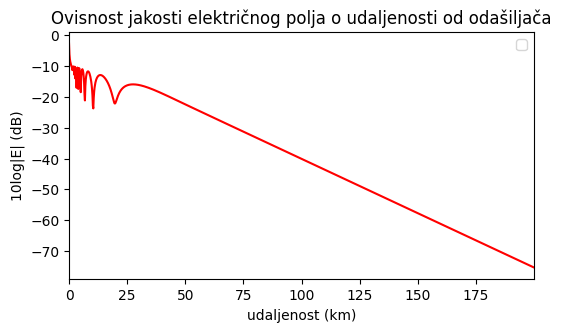

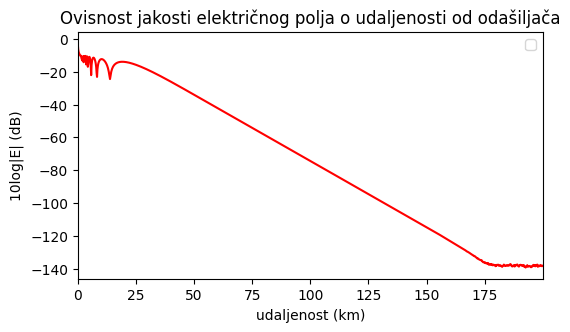

In [9]:
plt = vis.plot_hor(30)
plt.title('Ovisnost jakosti električnog polja o udaljenosti od odašiljača')
plt.xlabel('udaljenost (km)')
plt.ylabel('10log|E| (dB)')
plt.show()

plt = vis2.plot_hor(30)
plt.title('Ovisnost jakosti električnog polja o udaljenosti od odašiljača')
plt.xlabel('udaljenost (km)')
plt.ylabel('10log|E| (dB)')
plt.show()

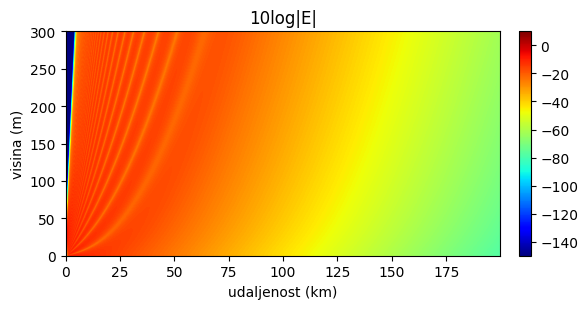

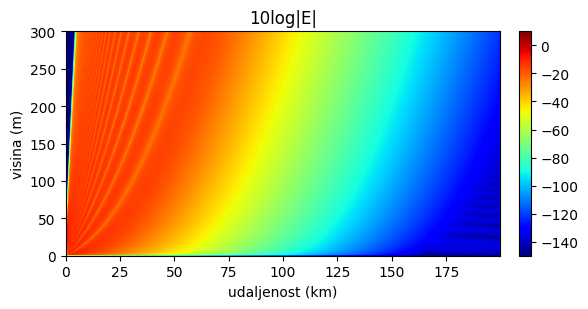

In [10]:
plt = vis.plot2d(min=-150, max=10)
plt.title('10log|E|')
plt.xlabel('udaljenost (km)')
plt.ylabel('visina (m)')
plt.tight_layout()
plt.show()

plt = vis2.plot2d(min=-150, max=10)
plt.title('10log|E|')
plt.xlabel('udaljenost (km)')
plt.ylabel('visina (m)')
plt.tight_layout()
plt.show()

**Zadatak 3.**

U nekoliko rečenica protumačiti grafove.



<font color='green'> Iz jakosti električnog polja u ovisnosti o udaljenosti mogu se iščitati Fresnelove zone te gubitak odnosno smanjenje intenziteta u ovisnosti o visini i udaljenosti od odašiljača tj. antene. Iz grafova je moguće očitati očekivano ponašanje propagacije vala.</font>

**Zadatak 4.**

Koliko iznosi zadana frekvencija signala u gornjem primjeru?


<font color='green'>Iz antennas.py: 3e8 / wavelength = 3e8 / 0.1 = 3e9 Hz</font>

**Zadatak 5.**

Promijeniti polarizaciju antene (ne mijenjajući ostale parametre) i usporediti rezultate iznosa električnog polja u odnosu na dani primjer. Koju biste vrstu polarizacije izabrali za korištenje i zašto?


<font color='green'>Promjenom polarizacije s horizontalne na vertikalnu, u našem modelu možemo vidjeti kako vertiklna polarizacija ima prednost u odnosu na horizontalnu polarizaciju signala jer daje veću jačinu električnog polja u odnosu na udaljenost. Zbog toga se mnoge realne primjene zasnivaju upravo na vertikalnoj polarizaciji poput FM radio postaja i mobilnih postaja.</font>

#2. Difrakcija (ogib) - model oštrice noža

Na objektima konačnih dimenzija javlja se difrakcija elektromagnetskih valova.
Difrakciju je moguće objasniti Huygensovim načelom; svaka točka valne fronte može se smatrati izvorom sfernog vala. Superpozicija sfernih homogenih planarnih valova rezultira novim homogenim planarnim valom (A' → B'). Planarni val ima neku fizičku veličinu konstantnu u ravnini okomitoj na smjer širenja vala (npr. fazu). Ako prepreka zakloni dio točkastog izvora ili s njim povezane sferne valove, rezultanti val više nije planarni (B' → C').

![picture](https://drive.google.com/uc?export=view&id=1CAgo0ZJZzZqX1ZLUPQ2_I66FLZPBLXR_)



Električno polje u točki iza prepreke (x >= 0) može se izraziti standardnim Fresnelovim integralom. Ako je upadno polje $\exp \left(-j k_{0} x\right)$, ukupno polje je:

\begin{equation}
E_{\text {total }}=\exp \left(-j k_{0} x\right)\left(\frac{1}{2}-\frac{\exp (j \pi / 4)}{\sqrt{2}} F\left(v_{\mathrm{F}}\right)\right)=\exp \left(-j k_{0} x\right) \tilde{F}\left(v_{\mathrm{F}}\right)
\end{equation}

Fresnelov parametar dan je izrazom $v_{\mathrm{F}}=-2y/\sqrt{\lambda x}$, a Fresnelov integral:
\begin{equation}
F\left(v_{\mathrm{F}}\right)=\int_{0}^{v_{\mathrm{F}}} \exp \left(-j \pi \frac{t^{2}}{2}\right) d t
\end{equation}




![picture](https://drive.google.com/uc?export=view&id=1rdvRzzGyZje2fdIj0ela7wX_dSuBtBMP)

Proračuni pokazuju da $\tilde{F}\left(v_{\mathrm{F}}\right)$ može biti veći od 0 za određene vrijednosti $v_{\mathrm{F}}$ - primljena snaga na određenoj lokaciji može se povećati zbog prisustva prepreke. Huygensovo načelo daje objašnjenje: blokirani su neki sferni valovi koji bi inače interferirali destruktivno. No, ukupna energija (integral preko cijele valne fronte) ne može se povećati postojanjem prepreke.

Promatranjem općenite geometrije na priloženoj slici, moguće je izračunati kut ogiba $\theta_{\mathrm{d}}$:
![picture](https://drive.google.com/uc?export=view&id=1DLJZ2UWy9_-QTRAFjXCNTAXZIl0nYtAT)

\begin{equation}
\theta_{\mathrm{d}}=\arctan \left(\frac{h_{\mathrm{s}}-h_{\mathrm{TX}}}{d_{\mathrm{TX}}}\right)+\arctan \left(\frac{h_{\mathrm{s}}-h_{\mathrm{RX}}}{d_{\mathrm{RX}}}\right)
\end{equation}

i Fresnelov parametar:

\begin{equation}
\nu_{\mathrm{F}}=\theta_{\mathrm{d}} \sqrt{\frac{2 d_{\mathrm{TX}} d_{\mathrm{RX}}}{\lambda\left(d_{\mathrm{TX}}+d_{\mathrm{RX}}\right)}}
\end{equation}



**Zadatak 6.**

Razmotriti difrakciju na prepreci uz udaljenost odašiljača i prepreke 200 m, prepreke i prijamnika 50 m, visinu odašiljača 20 m, visinu prijamnika 1.5 m i visinu prepreke 40 m. Središnja frekvencija je 900 MHz. Izračunajte Fresnelov integral i iznos ukupnog električnog polja.

*Napomena: koristiti MATLAB/internetski dostupne kalkulatore.*




<font color='green'> F = E_ukupno = 0.5257 - 0.5087i</font>

U nastavku će jakost električnog polja biti grafički prikazana pomoću *wave propagation frameworka*.

In [23]:
environment = Troposphere(flat='true')
environment.knife_edges = [KnifeEdge(range=300, height=40), KnifeEdge(range=600, height=50),KnifeEdge(range=900, height=40)]



antenna = Source(wavelength=1, height_m=50)

ke_diff = KnifeEdgeDiffractionCalculator(src=antenna,
                                     env=environment,
                                     max_range_m=1000)
field = ke_diff.calculate()



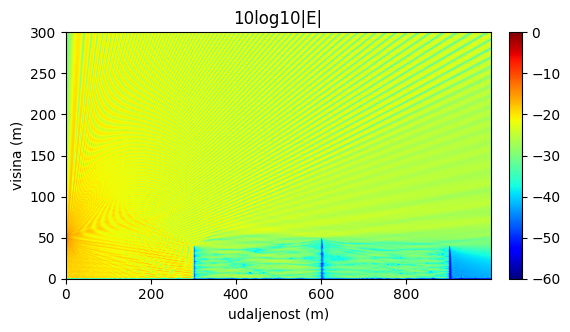

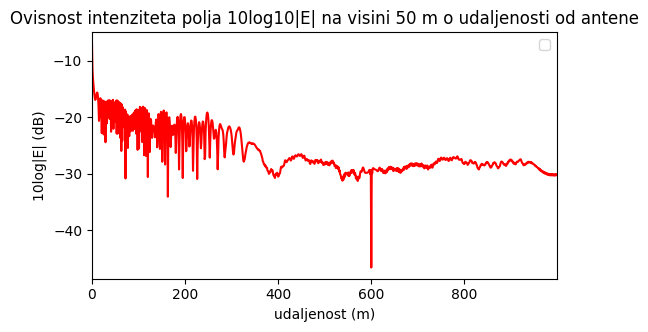

In [24]:
vis = FieldVisualiser(field, env=environment, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)))
plt = vis.plot2d(min=-60, max=0)
plt.title('10log10|E|')
plt.xlabel('udaljenost (m)')
plt.ylabel('visina (m)')
plt.show()

plt = vis.plot_hor(50)
plt.title('Ovisnost intenziteta polja 10log10|E| na visini 50 m o udaljenosti od antene')
plt.xlabel('udaljenost (m)')
plt.ylabel('10log|E| (dB)')
plt.show()


**Zadatak 7.**

a) Što je moguće vidjeti na gornjem grafu lijevo od prepreke (tj., što predstavljaju "mrlje" na slici)?

Napomena: mijenjati min i max parametre *plot2d* funkcije ako trenutni prikaz nije jasan.
Ograničenje visine prikaza vizualizatora električnog polja moguće je s promjenom vrijednosti atributa *environment.z_max*.

b) Je li na slici vidljiva antena? Ako da, kako?

b) Kako prepreka utječe na širenje signala? Objasniti donji graf.

<font color='green'>a) Mrlje prikazuju polje koje je jače jer postoji i kompnetna reflektiranog polja od prepreke.

b) Antena je vidljiva na grafu jer je polje oko nje najjače, odnosno prikazano je crvenom bojom

c) Možemo vidjeti da prije prepreke postoji valovit oblik jačine električnog polja čemu je razlog refleksija polja od tla, dok nakon prepreke ne postoji ta komponenta što je oečkivano zbog geometrije problema.</font>

**Zadatak 8.**

Promijeniti visinu prepreke na proizvoljan iznos tako da bude:

a) niža od antene,

b) viša od antene.

Kakve je promjene u odnosu na gornji primjer moguće uočiti?


In [17]:
a) Ako je visina niža od antene, možemo vidjeti da očekivano na 50 metara imamo smanjeni utjecaj prepreke i to poglavito na reflektirani intenzitet.

b) Ako je visina prepreke veća od visine antene, možemo vidjeti kako se intenzitet električnog polja uvelike smanjio na visini od 50m, na duljinama iza prepreke,
a oscilacije prije su veće jer se više signala reflektira od prepreke.

SyntaxError: unmatched ')' (<ipython-input-17-799c3d3131dc>, line 1)

**Zadatak 9.**

Dodati nekoliko prepreka na različitim proizvoljnim udaljenostima od odašiljača proizvoljnih visina. Usporediti rezultat s primjerom.

In [14]:
a) Rezultat je očekivan. Na 50m visine možemo vidjeti sve prije spomenute efekte, no nakon svake prepreke u smanjenom opsegu što je normalno obzirom da intenzitet signala pada.

**Zadatak 10.**

Difrakcija na prepreci problem je kojim su se istraživači često bavili jer se može svesti na zatvorenu matematičku formu koja je temelj za razmatranje složenijih problema. U stvarnom svijetu između odašiljača i prijamnika postoji više od jedne prepreke (jednog objekta koji "ometa" širenje signala). Situacija se može dobro aproksimirati difrakcijom na više prepreka, što je složen matematički problem.

Koje su najpoznatije metode aproksimacije difrakcije na više prepreka i koje su im temeljne razlike?

<font color='green'>Prostor za odgovor...</font>

#Literatura

[1] Andreas F. Molisch, Wireless Communications, Second Edition, Wiley Publishing, 2011.


[2] M. Lytaev, Wave propagation framework, https://wave-propagation.readthedocs.io/en/latest/index.html

[3] S. A. Vavilov, M. S. Lyataev, Modeling Equation for Multiple Knife-Edge Diffraction, IEEE Trasactions on Antennas and Propagation, vol. 68, no. 5, 2020.